# Hebb Net

## *plotting* function

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

### a) *step* Bipolar

In [2]:
def bipstep(y, th=0):
    return 1 if y >= th else -1

### b) Hebb training

In [3]:
def hebb_fit(train, target, verbose=False, draw=False,draw_padding=1):
    w = np.zeros(len(train[0]) + 1)
    bias = np.ones((len(train),1))
    train = np.hstack((bias, train))
    for r, row in enumerate(train):
        w = [w[i] + row[i] * target[r] for i in range(len(row))]
        if verbose:
            print('Bobot:', w)
            print("bias",bias)
        if draw:
            plot(line(w, 0), train, target, draw_padding)

    return w

### c) Hebb testing

In [4]:
def hebb_predict(X, w):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = bipstep(y_in)
        Y.append(y)
    return Y

### d) Accuracy function

In [5]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)

### e) AND Logic

In [6]:
from sklearn.metrics import accuracy_score
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
model = hebb_fit(train, target, verbose=True, draw=False)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Bobot: [1.0, 1.0, 1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]
Bobot: [0.0, 0.0, 2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]
Bobot: [-1.0, 1.0, 1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]
Bobot: [-2.0, 2.0, 2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


### f) OR Logic

Bobot: [1.0, 1.0, 1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


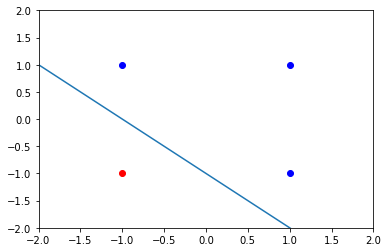

Bobot: [2.0, 2.0, 0.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


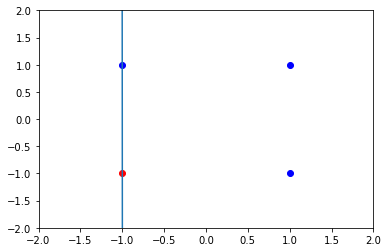

Bobot: [3.0, 1.0, 1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


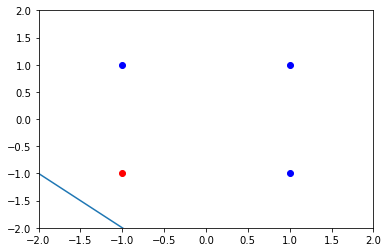

Bobot: [2.0, 2.0, 2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


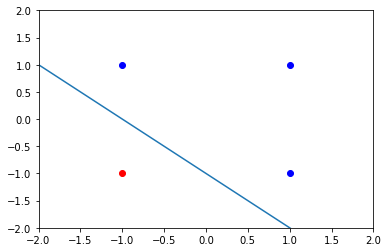

Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [7]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### g) AND NOT Logic

Bobot: [-1.0, -1.0, -1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


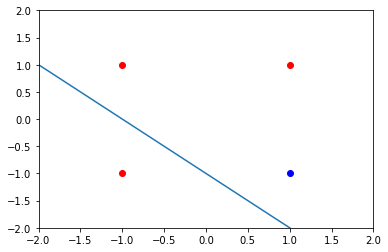

Bobot: [0.0, 0.0, -2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


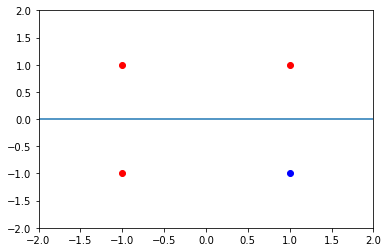

Bobot: [-1.0, 1.0, -3.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


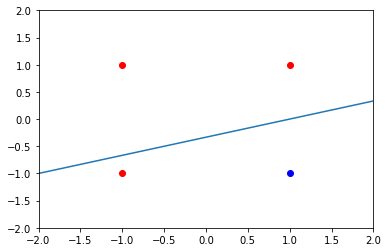

Bobot: [-2.0, 2.0, -2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


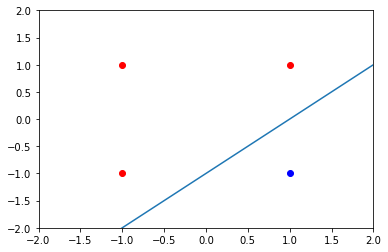

Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [8]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### h) XOR Logic

Bobot: [-1.0, -1.0, -1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


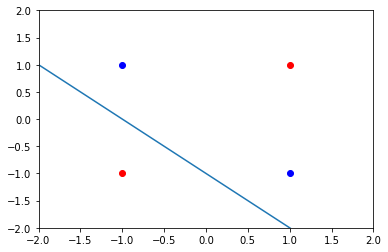

Bobot: [0.0, 0.0, -2.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


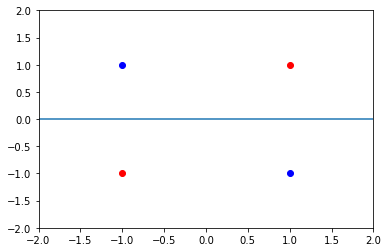

Bobot: [1.0, -1.0, -1.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


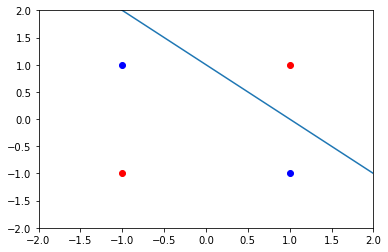

Bobot: [0.0, 0.0, 0.0]
bias [[1.]
 [1.]
 [1.]
 [1.]]


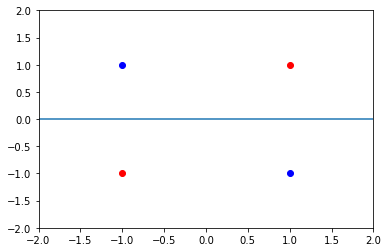

Output: [1, 1, 1, 1]
Target: (-1, 1, 1, -1)
Accuracy: 0.5


In [9]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
model = hebb_fit(train, target, verbose=True ,draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Bobot: [-1.0, 1.0, -0.5]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


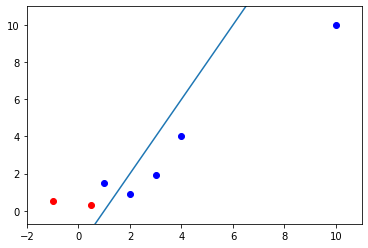

Bobot: [-2.0, 0.5, -0.8]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


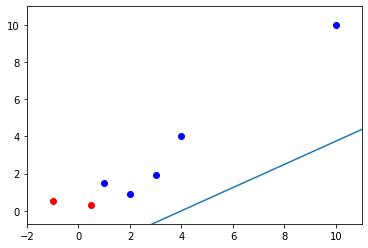

Bobot: [-1.0, 1.5, 0.7]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


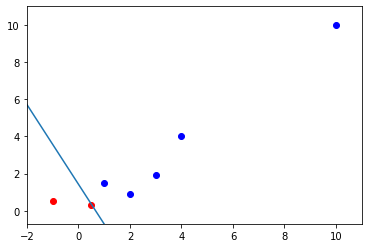

Bobot: [0.0, 4.5, 2.5999999999999996]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


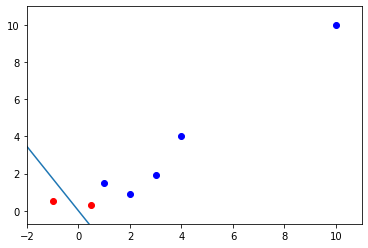

Bobot: [1.0, 6.5, 3.4999999999999996]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


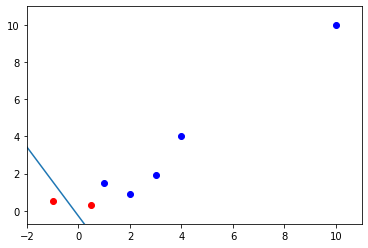

Bobot: [2.0, 10.5, 7.5]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


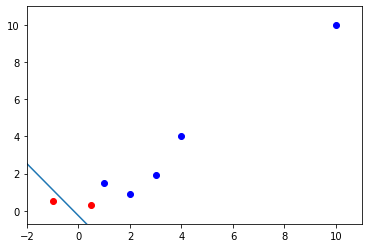

Bobot: [3.0, 20.5, 17.5]
bias [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


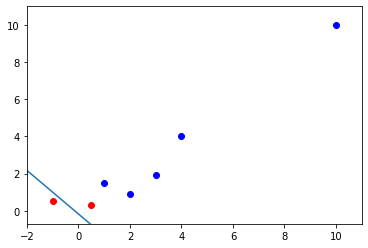

Output: [-1, 1, 1, 1, 1, 1, 1]
Target: (-1, -1, 1, 1, 1, 1, 1)
Accuracy: 0.8571428571428571


In [15]:
train = (-1, .5), (.5, .3), (1, 1.5), (3, 1.9), (2,0.9), (4,4), (10,10), (100,100)
target = (-1, -1, 1, 1,1,1,1,1)
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)